In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
with open('/home/ahojel/visual_prompting_vid/output_dir/valset_1/log.txt', 'r') as file:
    data = file.readlines()


# Convert each line from string to dictionary
data = data[1:]
data = [eval(line.strip()) for line in data]

# Create a DataFrame
df = pd.DataFrame(data)


In [24]:
df_segmentation["r_accuracy"]

0        0.686551
1        0.836377
2        0.907637
3        0.894002
4        0.895301
           ...   
11885    0.858372
11886    0.858210
11887    0.846603
11888    0.829559
11889    0.808944
Name: r_accuracy, Length: 1810, dtype: float64

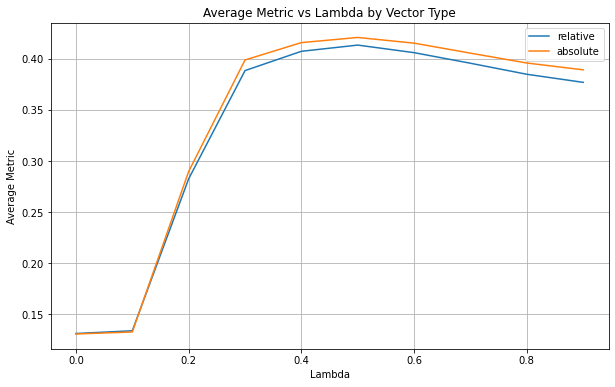

In [34]:
df_segmentation = df[df['task'] == 'label_segmentation']

df_segmentation = df_segmentation[df_segmentation['encoder']==False]

grouped_data = df_segmentation.groupby(['lambda', 'vector','encoder'])[['r_iou',"iou"]].mean().reset_index()

# Creating the line plot with the corrected data
plt.figure(figsize=(10, 6))
for vector_type, encoder_type in grouped_data[['vector', 'encoder']].drop_duplicates().values:
    df_filtered = grouped_data[(grouped_data['vector'] == vector_type) & (grouped_data['encoder'] == encoder_type)]
    label = f"{vector_type} - {'Both' if encoder_type else 'Decoder Only'}"
    linestyle = '-' if encoder_type else '--'
    plt.plot(df_filtered['lambda'].to_numpy(), df_filtered['r_iou'].to_numpy(), label="relative")
    plt.plot(df_filtered['lambda'].to_numpy(), df_filtered['iou'].to_numpy(), label="absolute")

#baseline = df[df['task'] == 'label_segmentation'][df[df['task'] == 'label_segmentation']['lambda'].isna()]["accuracy"].mean()
#plt.axhline(y=baseline, color='red', linestyle='--', label='Baseline')

plt.xlabel('Lambda')
plt.ylabel('Average Metric')
plt.title('Average Metric vs Lambda by Vector Type')
plt.legend()
plt.grid(True)
plt.show()

3.3899375993643015
0.6271931769118768
0.5650035025265867
0.6733354164639295
0.5595049902165826
0.5628610739913908


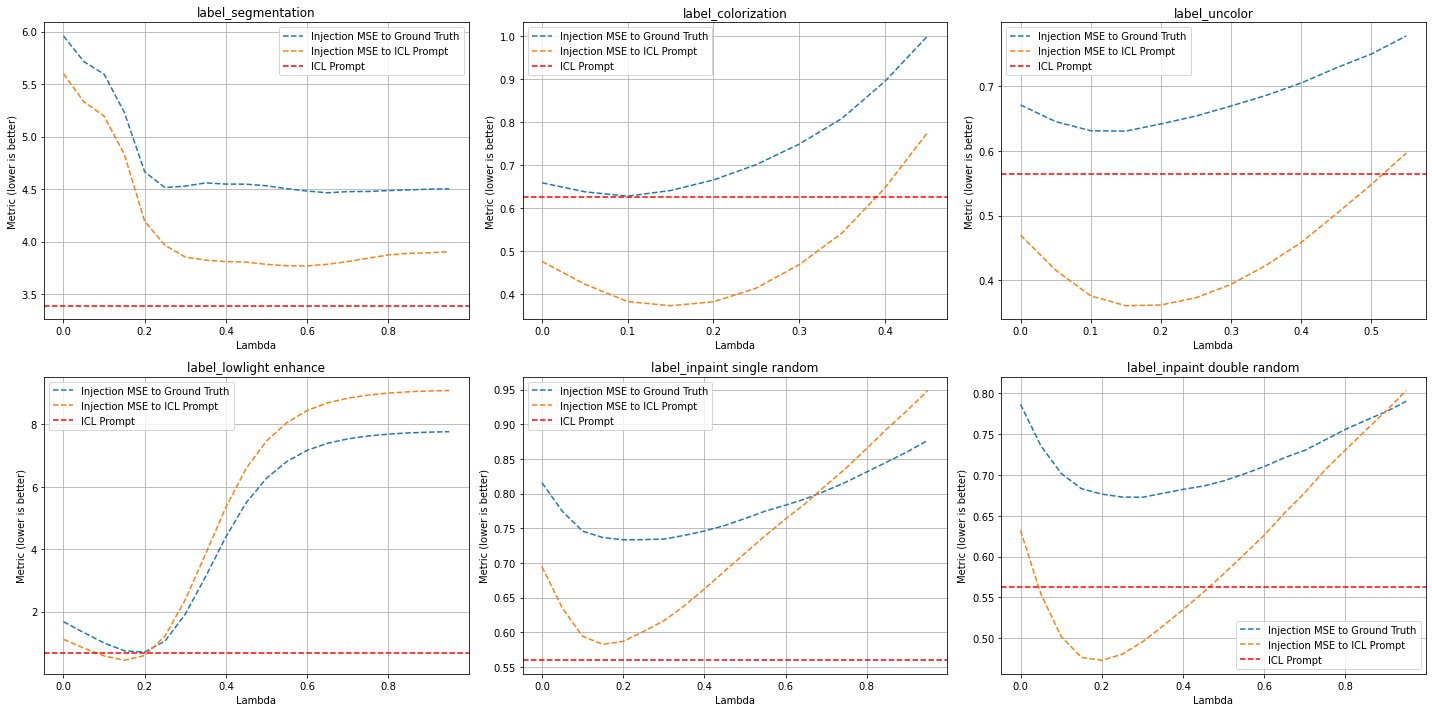

In [10]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))

# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda','vector','encoder',"only_cls"])[['metric',"r_metric"]].mean().reset_index()

    # Creating the line plot for the current task
    for vector_type, encoder_type, cls_type in grouped_data[['vector', 'encoder', 'only_cls']].drop_duplicates().values:
        df_filtered = grouped_data[(grouped_data['vector'] == vector_type) & (grouped_data['encoder'] == encoder_type)& (grouped_data['only_cls'] == cls_type)]
        if (task == "label_colorization"):
            df_filtered = df_filtered[df_filtered["metric"]<1]
        if (task == "label_uncolor"):
            df_filtered = df_filtered[df_filtered["metric"]<0.8]
        label = f"Injection MSE to Ground Truth"
        linestyle = '-' if encoder_type else '--'
        axes[row, col].plot(df_filtered['lambda'].to_numpy(), df_filtered['metric'].to_numpy(), label=label, linestyle=linestyle)
        axes[row, col].plot(df_filtered['lambda'].to_numpy(), df_filtered['r_metric'].to_numpy(), label="Injection MSE to ICL Prompt", linestyle=linestyle)
    
    baseline = df_task[df_task['lambda'].isna()]["metric"].mean()
    print(baseline)
    axes[row, col].axhline(y=baseline, color='red', linestyle='--', label='ICL Prompt')
    
    axes[row, col].set_title(task)
    axes[row, col].set_xlabel('Lambda')
    axes[row, col].set_ylabel('Metric (lower is better)')
    axes[row, col].legend()
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

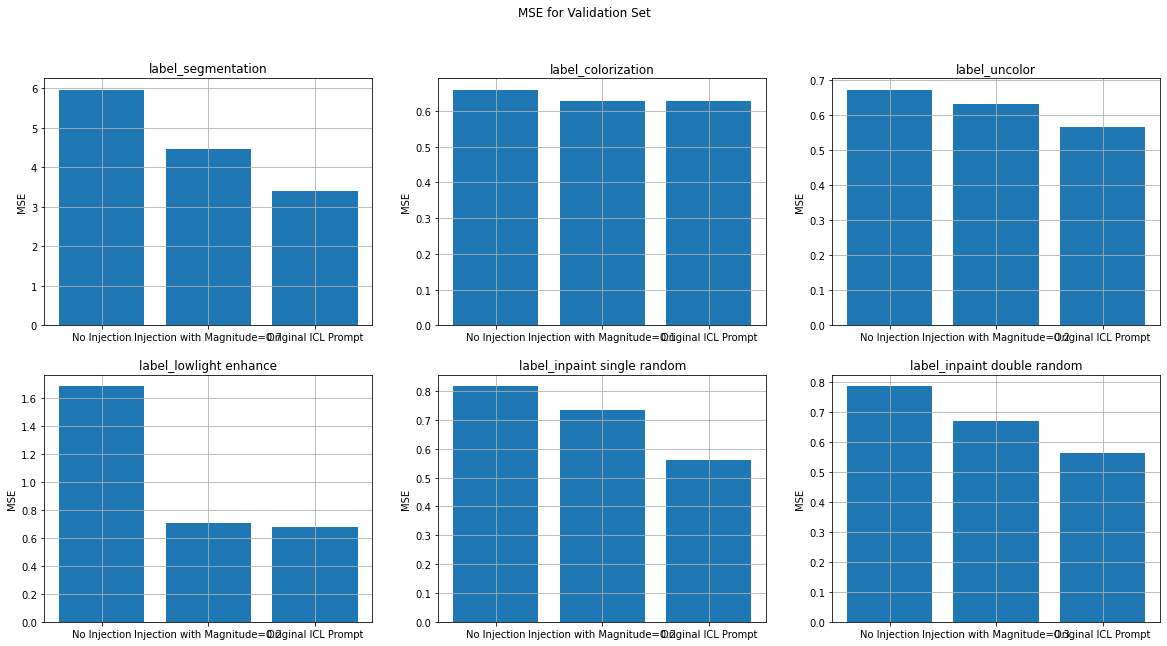

In [17]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))


# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    # Creating the bar plot for the current task
    lambda_zero_metric = grouped_data[grouped_data['lambda'] == 0]['metric'].mean()
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"].mean()
    best_lambda = grouped_data['lambda'][grouped_data['metric'].idxmin()]
    best_lambda_metric = grouped_data['metric'].min()

    # Plotting the metrics
    axes[row, col].bar(['No Injection', f'Injection with Magnitude={best_lambda:.1f}', 'Original ICL Prompt'], [lambda_zero_metric, best_lambda_metric, baseline_metric])

    axes[row, col].set_title(task)
    axes[row, col].set_ylabel('MSE')
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
fig.suptitle("MSE for Validation Set")
plt.show()

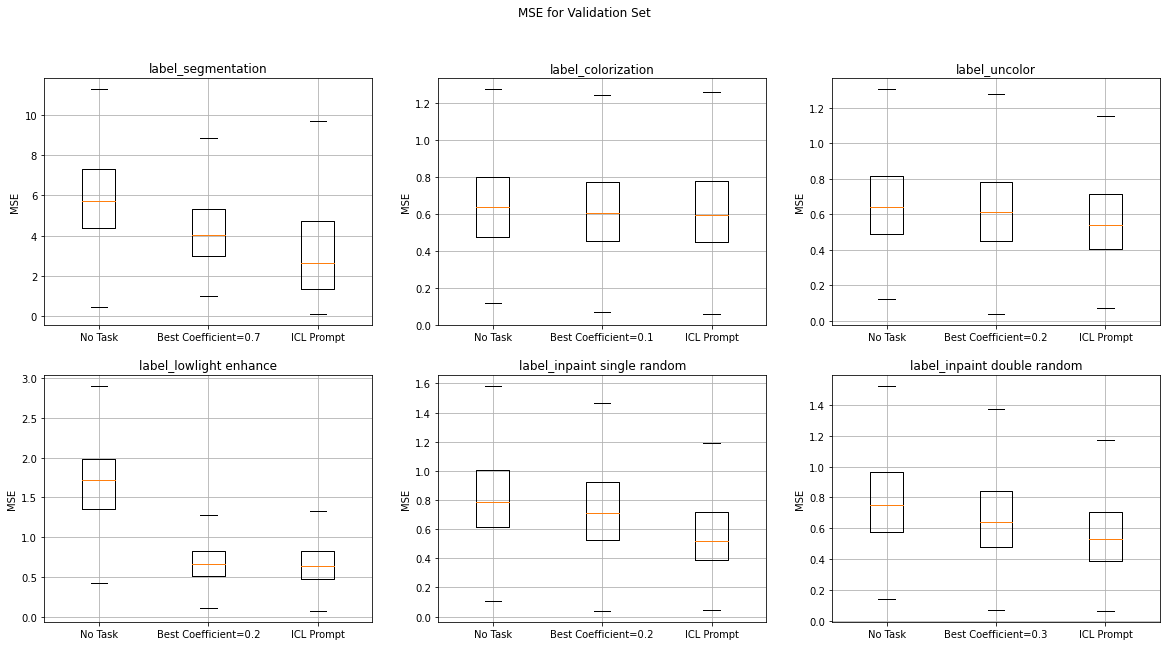

In [16]:
unique_tasks = df['task'].unique()
# Setting up the grid for plotting - assuming there are 6 unique tasks
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))


# Iterating over each task and creating a subplot
for i, task in enumerate(unique_tasks):
    # Calculate the row and column index for the current subplot
    row = i // num_cols
    col = i % num_cols

    # Filter the dataframe for the current task and group by 'lambda' and 'vector'
    df_task = df[df['task'] == task]
    grouped_data = df_task.groupby(['lambda'])[['metric',"r_metric"]].mean().reset_index()

    # Creating the box and whiskers plot for the current task
    lambda_zero_metric = df_task[df_task['lambda'] == 0]['metric']
    baseline_metric = df_task[df_task['lambda'].isna()]["metric"]
    best_lambda = grouped_data['lambda'][grouped_data['metric'].idxmin()]
    best_lambda_metric = df_task[df_task['lambda'] == best_lambda]['metric']

    # Plotting the metrics
    data_to_plot = [lambda_zero_metric, best_lambda_metric, baseline_metric]
    axes[row, col].boxplot(data_to_plot, labels=['No Task', f'Best Coefficient={best_lambda:.1f}', 'ICL Prompt'], showfliers=False, whiskerprops={'linestyle': 'none'})

    axes[row, col].set_title(task)
    axes[row, col].set_ylabel('MSE')
    axes[row, col].grid(True)

# Adjust layout to prevent overlap
fig.suptitle("MSE for Validation Set")
plt.show()

/tmp/ipykernel_656959/1079932571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance


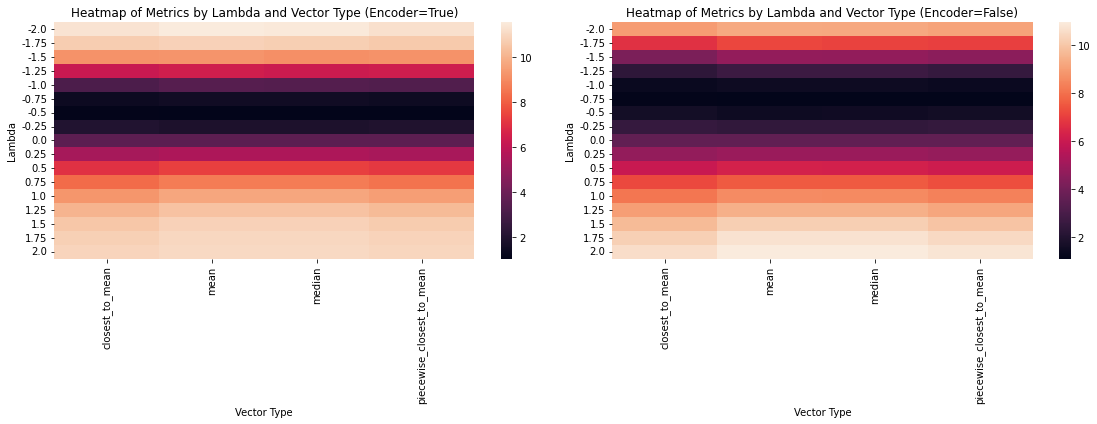

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

df_lowlight = df[df['task'] == 'label_lowlight enhance']
baseline_performance = df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()
df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance

# Setting up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Heatmap for encoder=True
pivot_table_true = df_lowlight[df_lowlight["encoder"]==True].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_true, ax=axes[0])
axes[0].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=True)')
axes[0].set_xlabel('Vector Type')
axes[0].set_ylabel('Lambda')

# Heatmap for encoder=False
pivot_table_false = df_lowlight[df_lowlight["encoder"]==False].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_false, ax=axes[1])
axes[1].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=False)')
axes[1].set_xlabel('Vector Type')
axes[1].set_ylabel('Lambda')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


419        True
420        True
421        True
422        True
423        True
          ...  
151754    False
151755    False
151756    False
151757    False
151758    False
Name: encoder, Length: 25340, dtype: bool

/tmp/ipykernel_656959/1079932571.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance


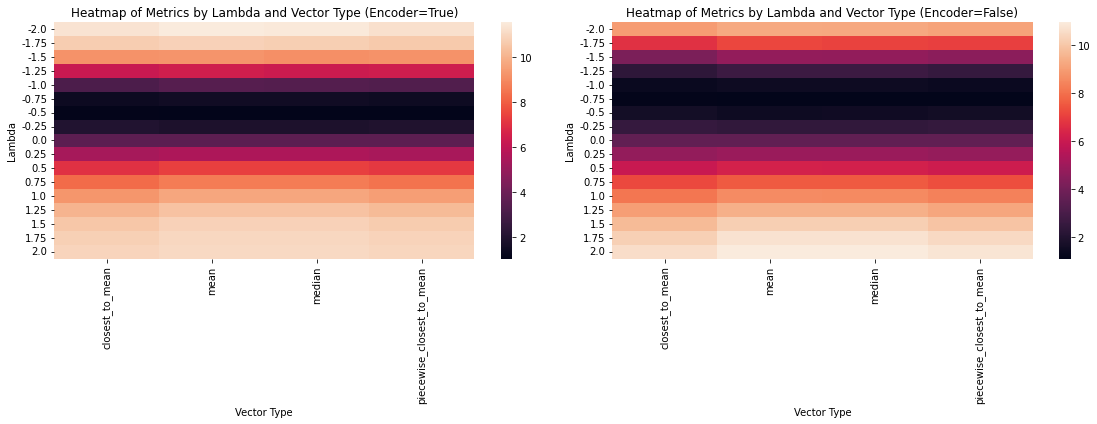

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

df_lowlight = df[df['task'] == 'label_lowlight enhance']
baseline_performance = df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()
df_lowlight["metric"] = df_lowlight["metric"] / baseline_performance

# Setting up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Heatmap for encoder=True
pivot_table_true = df_lowlight[df_lowlight["encoder"]==True].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_true, ax=axes[0])
axes[0].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=True)')
axes[0].set_xlabel('Vector Type')
axes[0].set_ylabel('Lambda')

# Heatmap for encoder=False
pivot_table_false = df_lowlight[df_lowlight["encoder"]==False].pivot_table(values='metric', index='lambda', columns='vector')
sns.heatmap(pivot_table_false, ax=axes[1])
axes[1].set_title('Heatmap of Metrics by Lambda and Vector Type (Encoder=False)')
axes[1].set_xlabel('Vector Type')
axes[1].set_ylabel('Lambda')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()


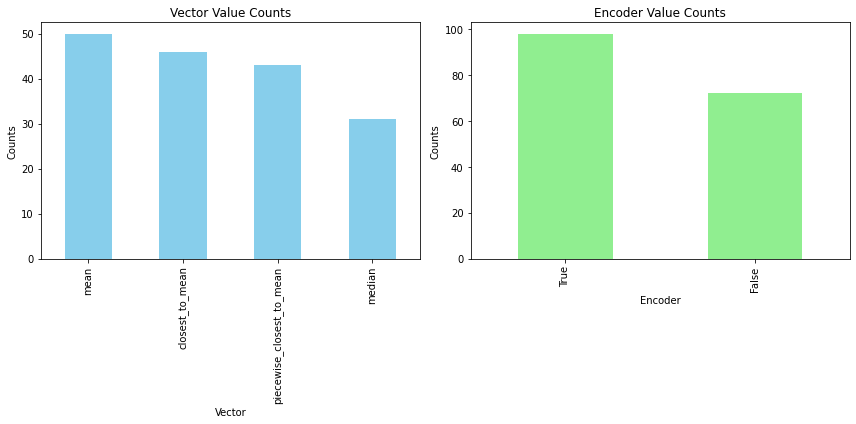

In [43]:

df_lowlight = df[df['task'] == 'label_lowlight enhance']

df_lowlight_filtered = df_lowlight.dropna(subset=['lambda'])
df_lowlight_filtered.groupby(['query_name', 'support_name'])['metric'].min().mean()


idx_best_performers = df_lowlight_filtered.groupby(['query_name', 'support_name'])['metric'].idxmin()
best_performing_rows = df_lowlight_filtered.loc[idx_best_performers]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plotting the 'vector' value counts on the first subplot
best_performing_rows["vector"].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Vector Value Counts')
axes[0].set_ylabel('Counts')
axes[0].set_xlabel('Vector')

# Plotting the 'encoder' value counts on the second subplot
best_performing_rows["encoder"].value_counts().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Encoder Value Counts')
axes[1].set_ylabel('Counts')
axes[1].set_xlabel('Encoder')

# Adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

In [31]:
df_lowlight[df_lowlight["lambda"].isna()]["metric"].mean()

0.4847286597005044

<AxesSubplot:>

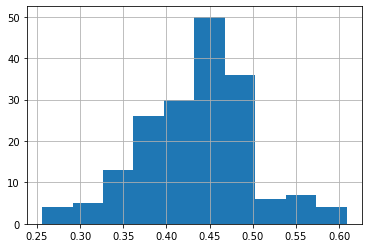

In [38]:
df[df["lambda"]==1.75]['segmentation_iou'].hist()

In [34]:
import numpy as np

np.array(avg_iou.index)

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

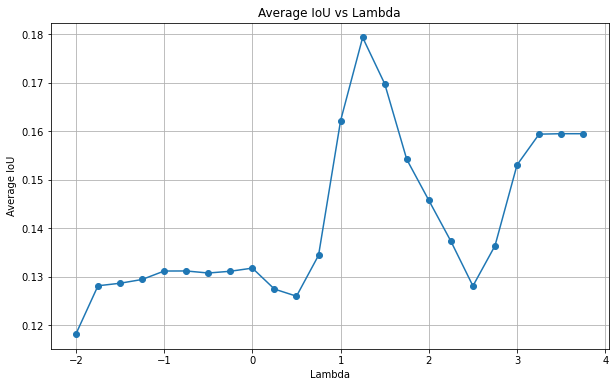

In [48]:
import matplotlib.pyplot as plt

avg_iou = df.groupby("lambda")["segmentation_iou"].mean()
plt.figure(figsize=(10, 6))
plt.plot(np.array(avg_iou.index), avg_iou.values, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Average IoU')
plt.title('Average IoU vs Lambda')
plt.grid(True)




In [21]:
df

,query_name,support_name,task,lambda,metric,vector,encoder
0,2007_004143,2011_000482,label_segmentation,0.0,2.241098,closest_to_mean,False
1,2007_004143,2011_000482,label_segmentation,NaN,0.424593,closest_to_mean,False
2,2007_004143,2011_000482,label_colorization,-2.0,0.434943,closest_to_mean,False
3,2007_004143,2011_000482,label_colorization,0.0,0.387492,closest_to_mean,False
4,2007_004143,2011_000482,label_colorization,NaN,0.364798,closest_to_mean,False
...,...,...,...,...,...,...,...
3252,2009_000828,2008_001580,label_inpaint single random,0.0,1.200064,closest_to_mean,False
3253,2009_000828,2008_001580,label_inpaint single random,NaN,0.222804,closest_to_mean,False
3254,2009_000828,2008_001580,label_inpaint double random,-2.0,0.335384,closest_to_mean,False
3255,2009_000828,2008_001580,label_inpaint double random,0.0,0.716131,closest_to_mean,False


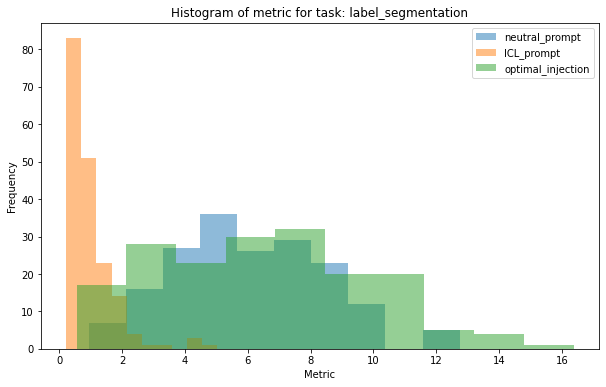

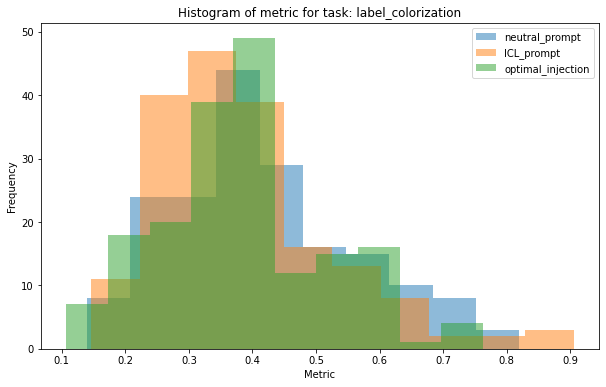

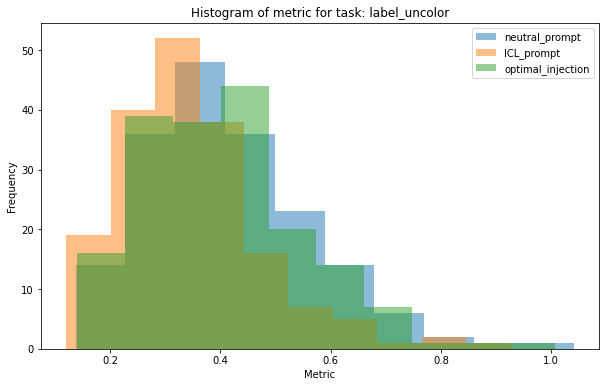

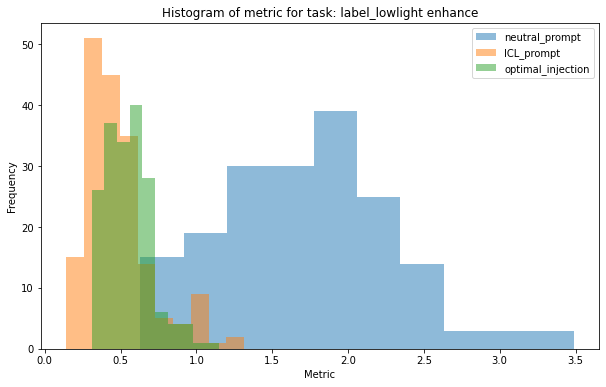

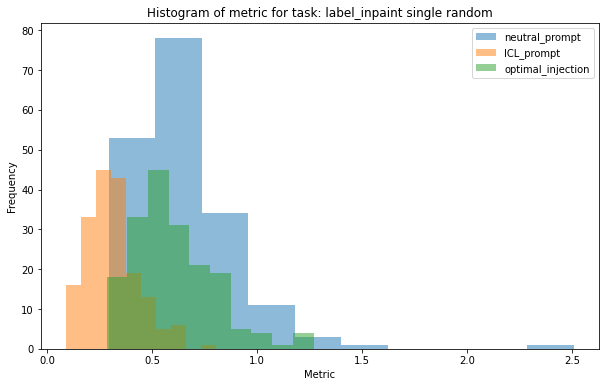

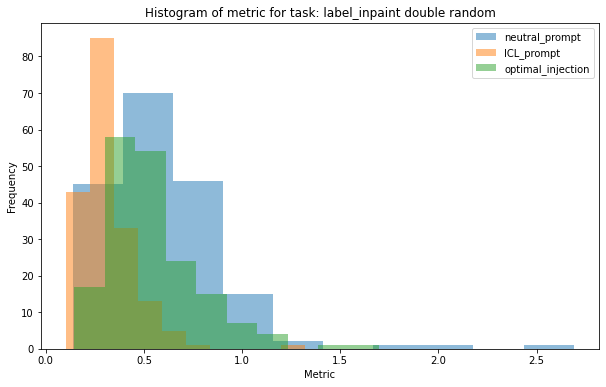

In [24]:
for task in df['task'].unique():
    plt.figure(figsize=(10, 6))
    plt.hist(df[(df["lambda"]==0) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='neutral_prompt')
    plt.hist(df[(df["lambda"].isna()) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='ICL_prompt')
    plt.hist(df[(~df["lambda"].isna()) & (df["lambda"]!=0) & (df['task']==task)]['metric'], bins=10, alpha=0.5, label='optimal_injection')
    plt.title(f'Histogram of metric for task: {task}')
    plt.xlabel('Metric')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


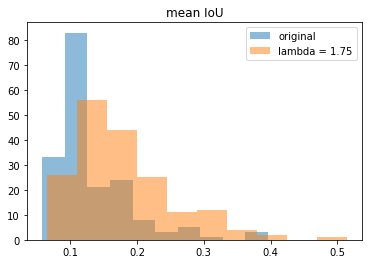

In [49]:

import matplotlib.pyplot as plt
plt.title("mean IoU")
plt.hist(df[df["lambda"]==0]['segmentation_iou'], alpha=0.5, label='original')
plt.hist(df[df["lambda"]==1.25]['segmentation_iou'], alpha=0.5, label='lambda = 1.75')
plt.legend(loc='upper right')
plt.show()





<AxesSubplot:>

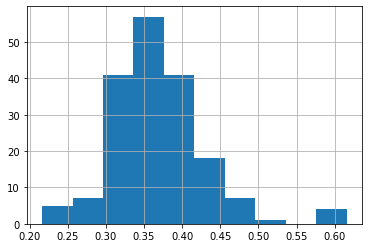

In [11]:
df["segmentation_iou"].hist()

In [80]:
with open('output_dir/base1/log.txt', 'r') as file:
    data = file.readlines()

# Convert each line from string to dictionary
data = [eval(line.strip()) for line in data]

# Create a DataFrame
df = pd.DataFrame(data)

df_unique = df.drop_duplicates(subset=["query_name", "support_name"])

# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_unique[df_unique['iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [81]:
with open('output_dir/multi_pass/log.txt', 'r') as file:
    data2 = file.readlines()

# Convert each line from string to dictionary
data2 = [eval(line.strip()) for line in data2]

df_multi = pd.DataFrame(data2)

In [82]:
df_multi[df_multi["support_name"].isin(both_filtered_df["support_name"])]

,query_name,support_name,segmentation_iou,colorization_mse,bw_mse,neutral_copy_mse,inpaint_black_mse,inpaint_white_mse,lowlight_mse
0,2007_000033,2011_002515,0.646447,0.482051,0.382694,0.334660,0.427270,0.470124,0.594962
1,2007_000061,2009_003080,0.169599,0.240414,0.271365,0.259541,0.262019,0.916627,0.351353
3,2007_000346,2008_002775,0.419836,0.580908,0.596427,0.492930,0.612987,2.806064,0.608037
4,2007_000529,2008_001040,0.000000,0.387258,0.287217,0.303370,0.286978,0.523840,0.351481
5,2007_000559,2010_005496,0.000273,0.802558,0.611293,0.581877,0.782396,1.532250,1.011638
...,...,...,...,...,...,...,...,...,...
4994,2009_001108,2011_002295,0.357285,0.552364,0.203771,0.130769,0.163658,3.260161,0.637539
4995,2009_001160,2010_003771,0.312925,0.608646,0.598040,0.317253,0.424614,0.569236,0.386566
4997,2009_001278,2009_002856,0.000000,0.700278,0.547202,0.570241,0.579178,3.768245,0.651298
4998,2009_001314,2009_004895,0.624346,0.618287,0.248800,0.090045,0.254124,3.851539,1.060767


In [83]:
# Group by 'query_name' and find the one with the lowest average 'iou'
df2 = df_multi[df_multi['segmentation_iou'] >= 0.2]
grouped_query = df2.groupby('query_name')['segmentation_iou'].mean()
filtered_query_names = grouped_query[grouped_query >= 0.6].index
filtered_df = df2[df2['query_name'].isin(filtered_query_names)]

# Group by 'support_name' and find the one with the lowest average 'iou'
grouped_support = filtered_df.groupby('support_name')['segmentation_iou'].mean()
filtered_both_names = grouped_support[grouped_support >= 0.6].index
both_filtered_df = filtered_df[filtered_df['support_name'].isin(filtered_both_names)]


In [108]:
new_df = both_filtered_df[both_filtered_df['segmentation_iou'] >= 0.5]

In [109]:
grouped_support = new_df.groupby('support_name')['inpaint_black_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [111]:
grouped_support = new_df.groupby('support_name')['colorization_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [115]:
grouped_support = new_df.groupby('support_name')['lowlight_mse'].mean()
filtered_both_names = grouped_support[grouped_support <= 0.5].index
new_df = new_df[new_df['support_name'].isin(filtered_both_names)]

In [132]:
filtered_df_sorted = new_df.sort_values(by=['support_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted.drop_duplicates(subset='support_name', keep='first')

filtered_df_sorted2 = df_filtered.sort_values(by=['query_name', 'segmentation_iou'], ascending=[True, False])
df_filtered = filtered_df_sorted2.drop_duplicates(subset='query_name', keep='first')

In [136]:
list_of_dicts = new_df[['query_name', 'support_name']].to_dict('records')

In [137]:
import json

with open('top_multitask_pairings2.json', 'w') as file:
    json.dump(list_of_dicts, file, indent=4)